In [24]:
#CNN model on MNIST dataset on written digit classification
from keras.datasets import mnist
#from keras.preprocessing.image import load_img, array_to_img
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Rest of your code

from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [26]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
# Understand the image format
X_train[0].shape

(28, 28)

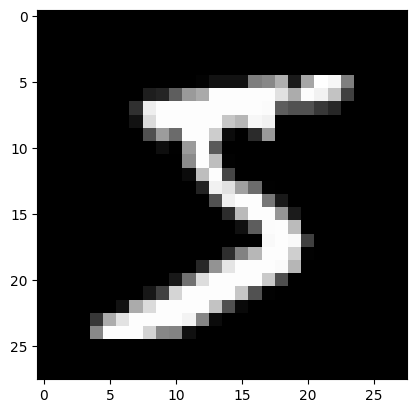

In [29]:
plt.imshow(X_train[0],cmap="gray")

In [30]:
y_train[0]

5

In [31]:
# Preprocess the image data
image_height, image_width=28,28


In [32]:
X_train=X_train.reshape(60000,image_height*image_width)
X_test=X_test.reshape(10000,image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [33]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [34]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255.0
X_test/=255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [35]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [36]:
# Converting the target value into 10 bins/categories. So the output of model will fall into one of these bins
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [37]:
# Building the CNN model
# First we will build the ANN model and then see the diff bet ANN and CNN
model=Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history=model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.0757 - val_accuracy: 0.9763
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0817 - val_accuracy: 0.9753
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0918 - val_accuracy: 0.9741
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0867 - val_accuracy: 0.9777
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0821 - val_accuracy: 0.9799
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0833 - val_accuracy: 0.9792
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0949 -

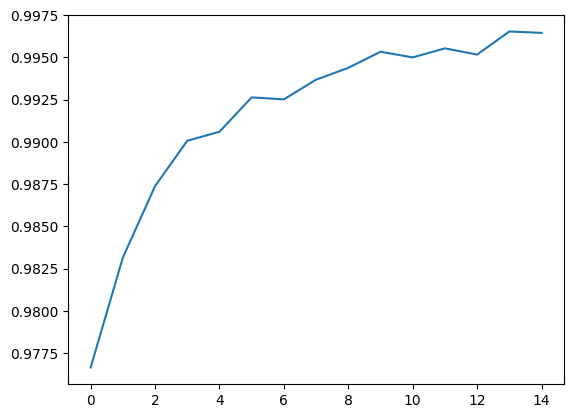

In [41]:
plt.plot(history.history['accuracy'])

In [42]:
score=model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1400 - accuracy: 0.9773


In [43]:
#Project on CIFAR-10
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical 

In [44]:
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [45]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [46]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [47]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [48]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [51]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [53]:
hist=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 140s 90ms/step - loss: 1.3604 - accuracy: 0.5106 - val_loss: 1.0819 - val_accuracy: 0.6142
Epoch 2/10
1563/1563 [==============================] - 2502s 2s/step - loss: 1.1299 - accuracy: 0.5977 - val_loss: 0.9609 - val_accuracy: 0.6562
Epoch 3/10
1563/1563 [==============================] - 191s 122ms/step - loss: 1.0056 - accuracy: 0.6460 - val_loss: 0.9018 - val_accuracy: 0.6818
Epoch 4/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9169 - accuracy: 0.6744 - val_loss: 0.8818 - val_accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8583 - accuracy: 0.6993 - val_loss: 0.7878 - val_accuracy: 0.7272
Epoch 6/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.8110 - accuracy: 0.7154 - val_loss: 0.7727 - val_accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7682 - accuracy: 0.7302 - val_loss: 0

In [54]:
# model_structure= model.to_json()
# f=Path("model_structure.json")
# f.write_text(model_structure)
score=model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.7284 - accuracy: 0.7465


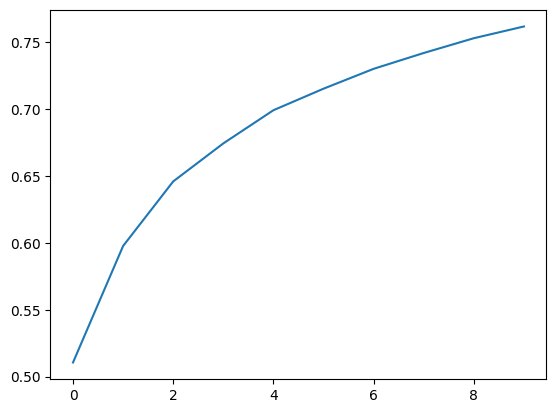

In [55]:
plt.plot(hist.history['accuracy'])

In [ ]:
# model.save_weights("model_weights.h5")

In [ ]:
# class_labels=[
#     "Planes",
#     "Car",
#     "Bird",
#     "Cat",
#     "Deer",
#     "Dog",
#     "Frog",
#     "Horse",
#     "Boat",
#     "Truck"
# ]


In [ ]:
# f=Path("model_structure.json")
# model_structure=f.read_text()

In [ ]:
# img= image.load_img("C:\\Users\\anu05\\Downloads\\download.jpeg",target_size=(32,32))
# plt.imshow(img)

NameError: name 'image' is not defined

In [ ]:
# image_to_test= image.img_to_array(img)

# list_of_image= np.expand_dims(image_to_test, axis=0)

# results= model.predict(list_of_images)

NameError: name 'image' is not defined

In [ ]:
# import numpy as np
# from keras.preprocessing import image
# from keras.models import model_from_json

# # Load the model architecture from the JSON file
# with open("model_structure.json", "r") as json_file:
#     model_structure = json_file.read()

# # Create the model from the loaded architecture
# model = model_from_json(model_structure)

# # Load the model weights
# model.load_weights("model_weights.h5")

# # Define class labels
# class_labels = [
#     "Planes",
#     "Car",
#     "Bird",
#     "Cat",
#     "Deer",
#     "Dog",
#     "Frog",
#     "Horse",
#     "Boat",
#     "Truck"
# ]

# # Define a function for prediction
# def predict_image_class(image_path):
#     img = image.load_img(image_path, target_size=(32, 32))  # Load and resize the image
#     img = image.img_to_array(img)  # Convert the image to a numpy array
#     img = np.expand_dims(img, axis=0)  # Add a batch dimension

#     # Preprocess the image (you may need to adapt this based on your preprocessing during training)
#     img = img / 255.0  # Normalize pixel values if you did this during training

#     # Make a prediction
#     predicted_probs = model.predict(img)
    
#     # Get the class label with the highest probability
#     predicted_class = np.argmax(predicted_probs)

#     # Map the predicted class label to its corresponding class name
#     class_name = class_labels[predicted_class]

#     return class_name, predicted_probs[0]

# # Example usage:
# image_path = "C:\\Users\\anu05\\Downloads\\d.jpg"
# predicted_class, predicted_probs = predict_image_class(image_path)
# print("Predicted class:", predicted_class)
# print("Predicted probabilities:", predicted_probs)


1/1 [==============================] - 0s 94ms/step
Predicted class: Horse
Predicted probabilities: [1.06288465e-02 4.71330397e-02 2.08607595e-03 6.78486144e-03
 2.92725116e-03 4.22631484e-03 4.59350236e-02 7.77026296e-01
 4.06231848e-05 1.03211775e-01]
